In [1]:
% reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import itertools
import warnings

In [3]:
co2 = pd.DataFrame.from_records(sm.datasets.co2.load().data)

In [4]:
co2.head(5)

,date,co2
0,b'19580329',316.1
1,b'19580405',317.3
2,b'19580412',317.6
3,b'19580419',317.5
4,b'19580426',316.4


In [5]:
co2['date'] = pd.to_datetime(co2['date'],format = "b'%Y%m%d'")

In [6]:
co2.head(5)

,date,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


In [7]:
co2 = co2.set_index('date')

In [8]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', name='date', length=2284, freq=None)

In [9]:
y = co2['co2'].resample('MS').mean()

In [10]:
y.head(5)

date
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

In [11]:
y['1990':]

date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-

In [12]:
y['1990']

date
1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
Freq: MS, Name: co2, dtype: float64

In [13]:
y['1995-10-01':'1996-10-01']

date
1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

In [14]:
y.isnull().sum()

5

In [15]:
y = y.fillna(y.bfill())

In [16]:
y.isnull().sum()

0

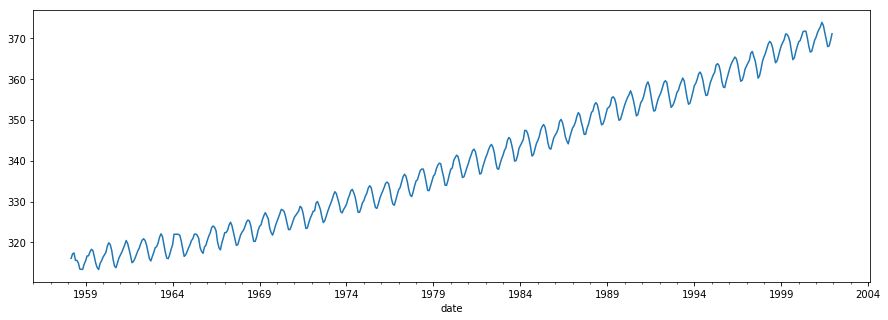

In [17]:
y.plot(figsize=(15,5))
plt.show()

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

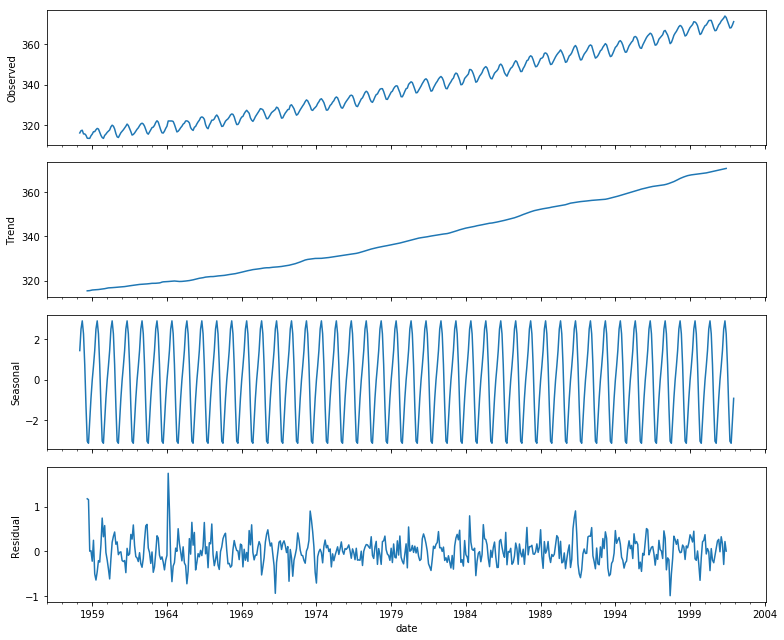

In [19]:
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [20]:
p = d = q = range(0,2)

In [21]:
pdq = list(itertools.product(p,d,q))

In [22]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [23]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:7612.583429881011
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343623902943
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1854.828234141261
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.711172763627
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320035
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.287868088971
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.65789780726
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912885
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755569043
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327715656
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067050825
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.4174716840712
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1085.308051728849
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.4312974885481
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.595789362531
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988732325
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1675.8086923024293
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.22111991941
ARIMA(0, 1

In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3182      0.092      3.442      0.001       0.137       0.499
ma.L1         -0.6254      0.077     -8.163      0.000      -0.776      -0.475
ar.S.L12       0.0010      0.001      1.732      0.083      -0.000       0.002
ma.S.L12      -0.8769      0.026    -33.812      0.000      -0.928      -0.826
sigma2         0.0972      0.004     22.632      0.000       0.089       0.106


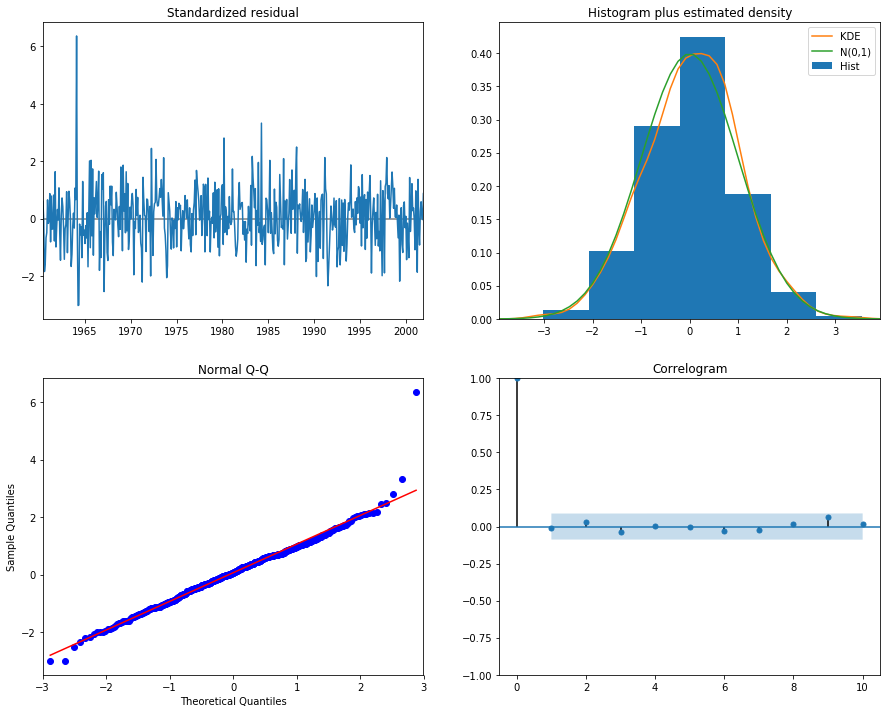

In [25]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [26]:
pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

In [27]:
pred_ci.head(5)

,lower co2,upper co2
date,,
1998-01-01,364.453365,365.675242
1998-02-01,365.373497,366.595374
1998-03-01,366.404738,367.626614
1998-04-01,367.908495,369.130371
1998-05-01,368.389517,369.611392


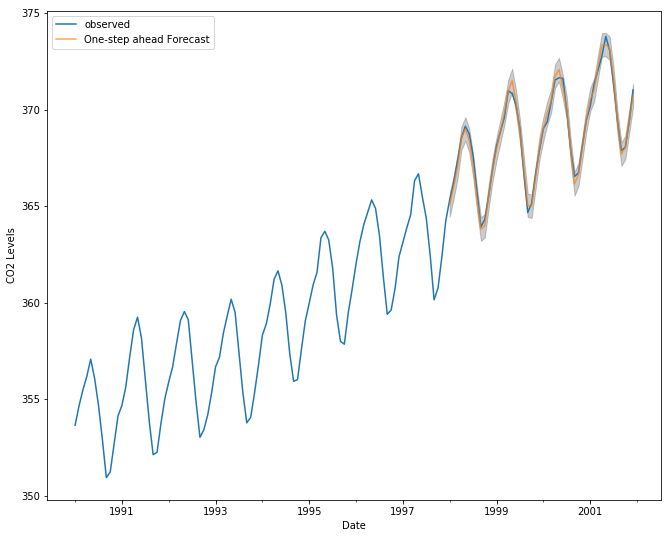

In [28]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [29]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.07


In [30]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

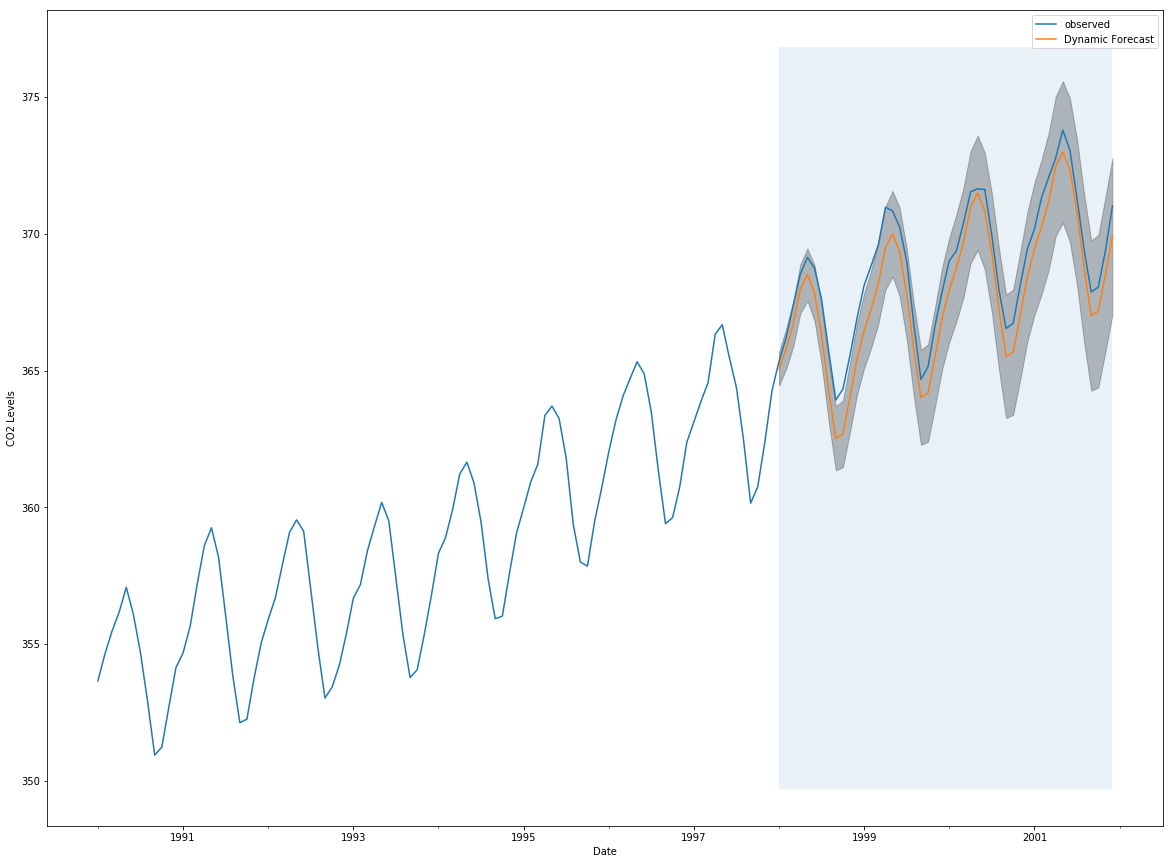

In [31]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [32]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 1.01


In [33]:
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

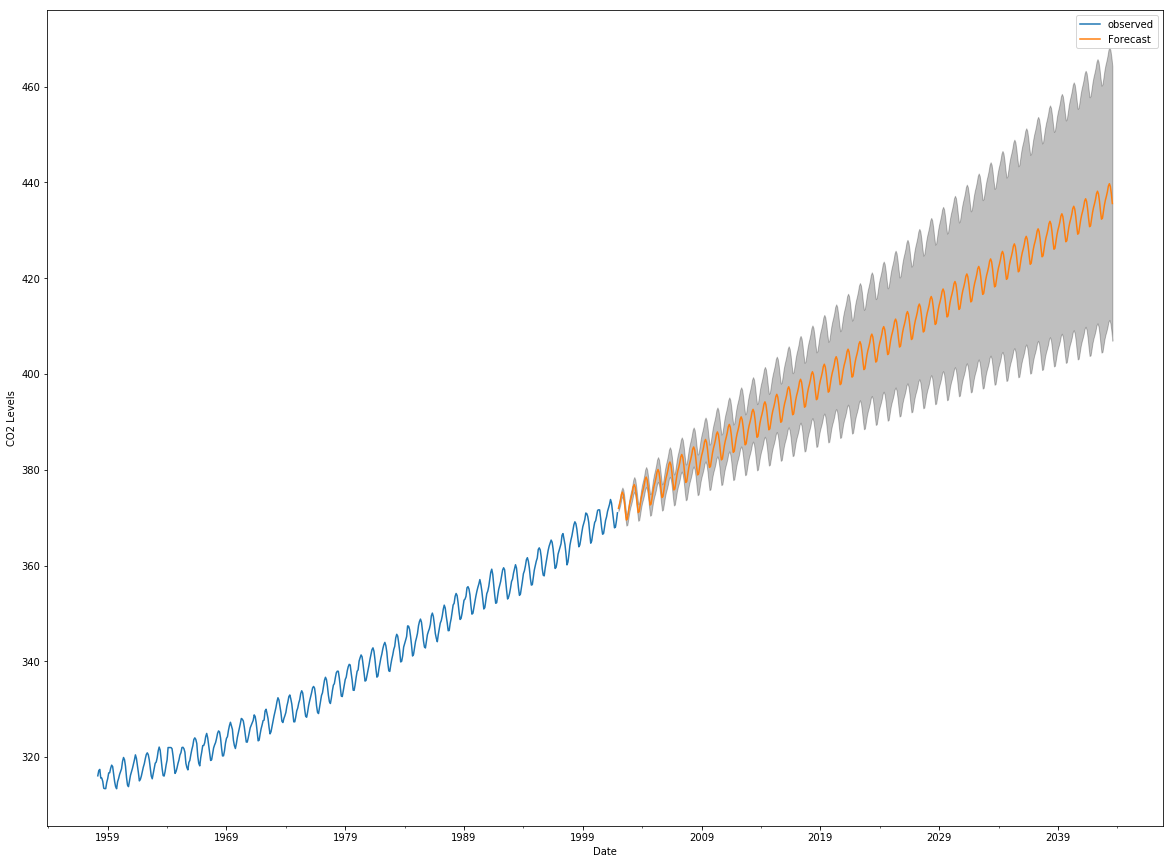

In [34]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()
